# Import Library

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import warnings
warnings.filterwarnings('ignore')

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Melihat Dataset

In [123]:
doc = pd.read_csv('/content/drive/MyDrive/Proyek Data Mining/bank_transactions_data_2.csv')
doc.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


kolom TransactionDate dan PreviousTransactionDate terbalik, sehingga dua kolom tersebut perlu ditukar

In [124]:
doc['TransactionDate'], doc['PreviousTransactionDate'] = doc['PreviousTransactionDate'].copy(), doc['TransactionDate'].copy()



In [125]:
doc.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2024-11-04 08:08:08,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2023-04-11 16:29:14
1,TX000002,AC00455,376.24,2024-11-04 08:09:35,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2023-06-27 16:44:19
2,TX000003,AC00019,126.29,2024-11-04 08:07:04,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2023-07-10 18:16:08
3,TX000004,AC00070,184.50,2024-11-04 08:09:06,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2023-05-05 16:32:11
4,TX000005,AC00411,13.45,2024-11-04 08:06:39,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2023-10-16 17:51:24


# EDA

## Berapa kali IP Adress, Locastion, Device, dan Merchant berubah

## IP Address

In [126]:
ril = doc.groupby('AccountID')['IP Address'].nunique()
print(ril)

AccountID
AC00001    2
AC00002    7
AC00003    5
AC00004    9
AC00005    9
          ..
AC00496    3
AC00497    6
AC00498    8
AC00499    7
AC00500    4
Name: IP Address, Length: 495, dtype: int64


sel ini memberikan informasi berapa IP Address yang dipakai tiap akun. misal akun AC00001 memmiliki 2 IP Address. fungsi nunique() mengembembalikan hasil berupa jumlah IP Address yang berbeda

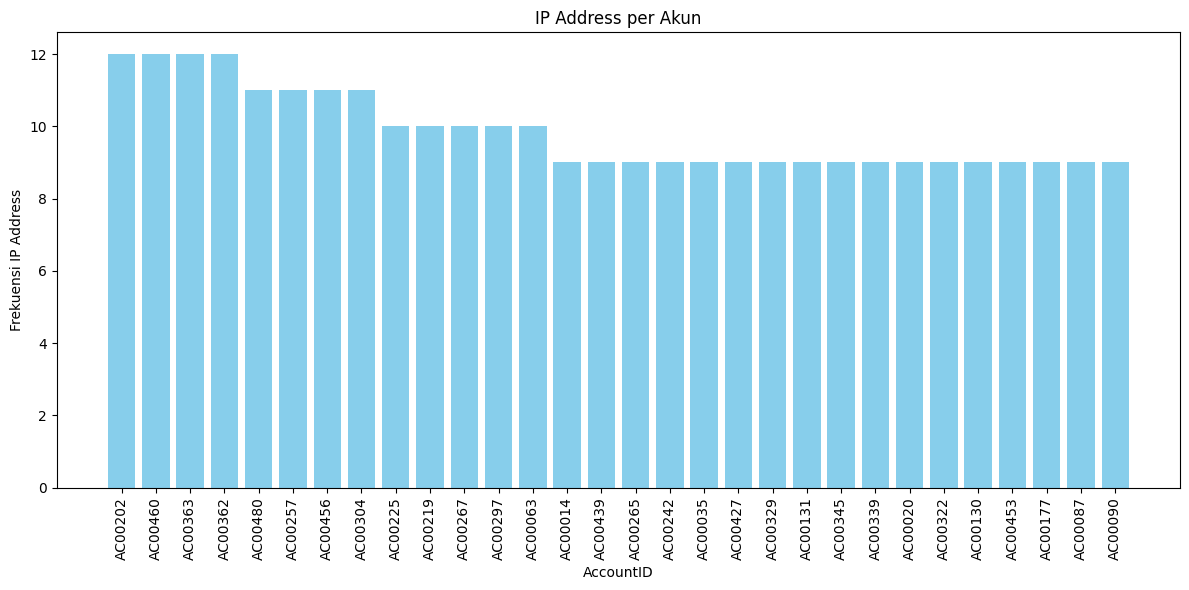

In [127]:
ril_df = ril.reset_index()
top_ip = ril_df.sort_values(by='IP Address', ascending=False).head(30)


# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(top_ip['AccountID'], top_ip['IP Address'], color='skyblue')
plt.xlabel('AccountID')
plt.ylabel('Frekuensi IP Address')
plt.title('IP Address per Akun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [128]:
ril_df.describe()

,IP Address
count,495.000000
mean,5.048485
std,2.273254
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,12.000000


In [129]:
count = ril_df[ril_df['IP Address'] == 1]
len(count['IP Address'].tolist())

24

## Location

In [130]:
location_unique = doc.groupby('AccountID')['Location'].nunique()
print(location_unique)

AccountID
AC00001    2
AC00002    7
AC00003    5
AC00004    9
AC00005    9
          ..
AC00496    3
AC00497    6
AC00498    8
AC00499    7
AC00500    3
Name: Location, Length: 495, dtype: int64


Menampilkan lokasi unik tiap akun. nampak bahwa akun AC00001 memiliki 2 lokasi sementara AC00002 memiliki 7 lokasi

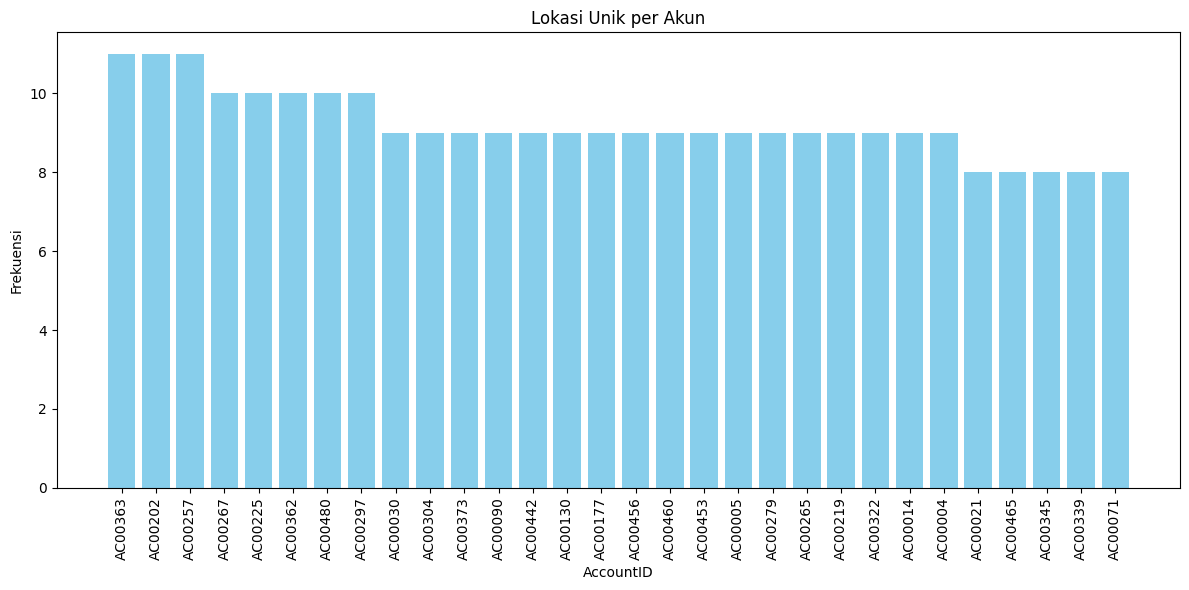

In [131]:
location_unique_df = location_unique.reset_index()
top_location = location_unique_df.sort_values(by='Location', ascending=False).head(30)


# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(top_location['AccountID'], top_location['Location'], color='skyblue')
plt.xlabel('AccountID')
plt.ylabel('Frekuensi')
plt.title('Lokasi Unik per Akun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [132]:
location_unique_df.describe()

,Location
count,495.000000
mean,4.783838
std,2.115047
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [133]:
count = location_unique_df[location_unique_df['Location'] == 1]
len(count['Location'].tolist())

25

## DeviceID

In [134]:
Device_unique = doc.groupby('AccountID')['DeviceID'].nunique()
print(Device_unique)

AccountID
AC00001    2
AC00002    7
AC00003    5
AC00004    9
AC00005    9
          ..
AC00496    3
AC00497    6
AC00498    8
AC00499    7
AC00500    4
Name: DeviceID, Length: 495, dtype: int64


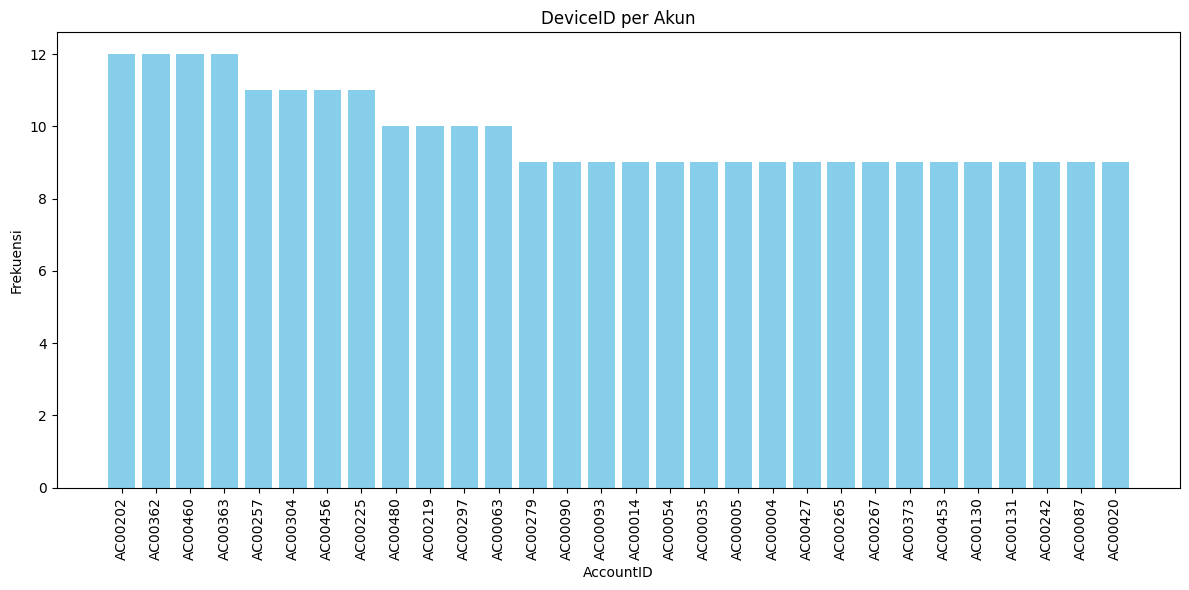

In [135]:
Device_unique_df = Device_unique.reset_index()
top_Device = Device_unique_df.sort_values(by='DeviceID', ascending=False).head(30)


# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(top_Device['AccountID'], top_Device['DeviceID'], color='skyblue')
plt.xlabel('AccountID')
plt.ylabel('Frekuensi')
plt.title('DeviceID per Akun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [136]:
Device_unique_df.describe()

,DeviceID
count,495.000000
mean,5.050505
std,2.277214
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,12.000000


In [137]:
count = Device_unique_df[Device_unique_df['DeviceID'] == 1]
len(count['DeviceID'].tolist())

24

## MerchantID

In [138]:
merchant_unique = doc.groupby('AccountID')['MerchantID'].nunique()
print(merchant_unique)

AccountID
AC00001    2
AC00002    6
AC00003    5
AC00004    9
AC00005    9
          ..
AC00496    3
AC00497    6
AC00498    8
AC00499    7
AC00500    4
Name: MerchantID, Length: 495, dtype: int64


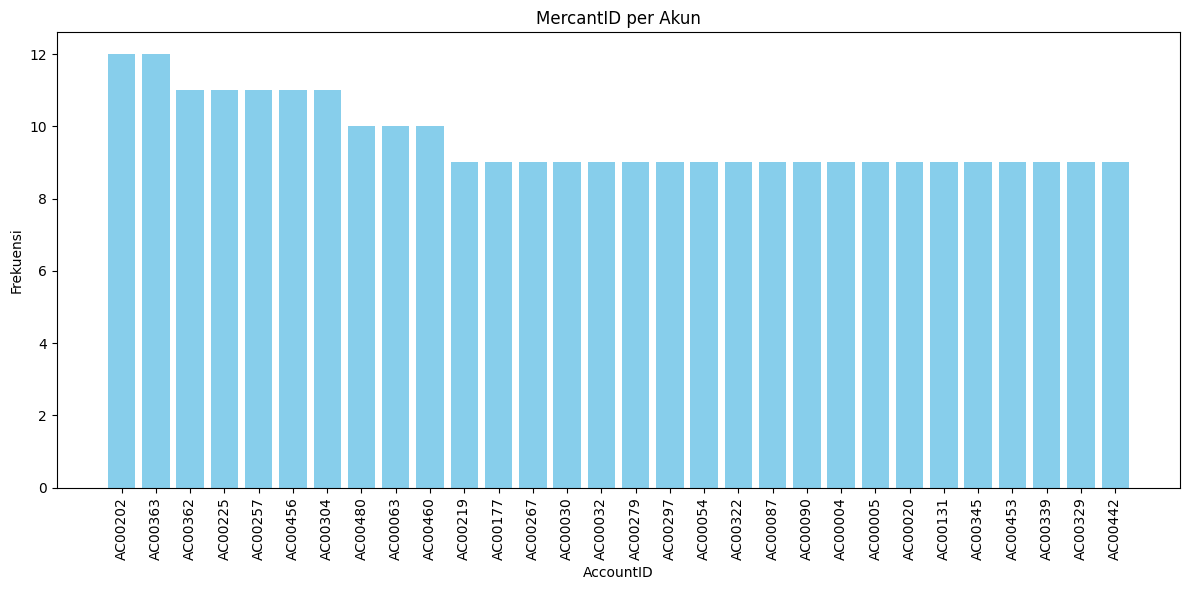

In [139]:
merchant_unique_df = merchant_unique.reset_index()
top_meerchantID = merchant_unique_df.sort_values(by='MerchantID', ascending=False).head(30)


# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(top_meerchantID['AccountID'], top_meerchantID['MerchantID'], color='skyblue')
plt.xlabel('AccountID')
plt.ylabel('Frekuensi')
plt.title('MercantID per Akun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [140]:
merchant_unique_df['MerchantID'].describe()

,MerchantID
count,495.000000
mean,4.941414
std,2.219394
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,12.000000


In [141]:
count = merchant_unique_df[merchant_unique_df['MerchantID'] == 1]
len(count['MerchantID'].tolist())

26

melihat rata-rata transaction tiap akun

## Transaction Mean

In [142]:
mean_trasaction = doc.groupby('AccountID')['TransactionAmount'].mean()
print(mean_trasaction)

AccountID
AC00001    130.380000
AC00002    293.744286
AC00003    253.268000
AC00004    242.231111
AC00005    347.974444
              ...    
AC00496    198.626667
AC00497    197.868333
AC00498    381.377500
AC00499    331.612857
AC00500    161.740000
Name: TransactionAmount, Length: 495, dtype: float64


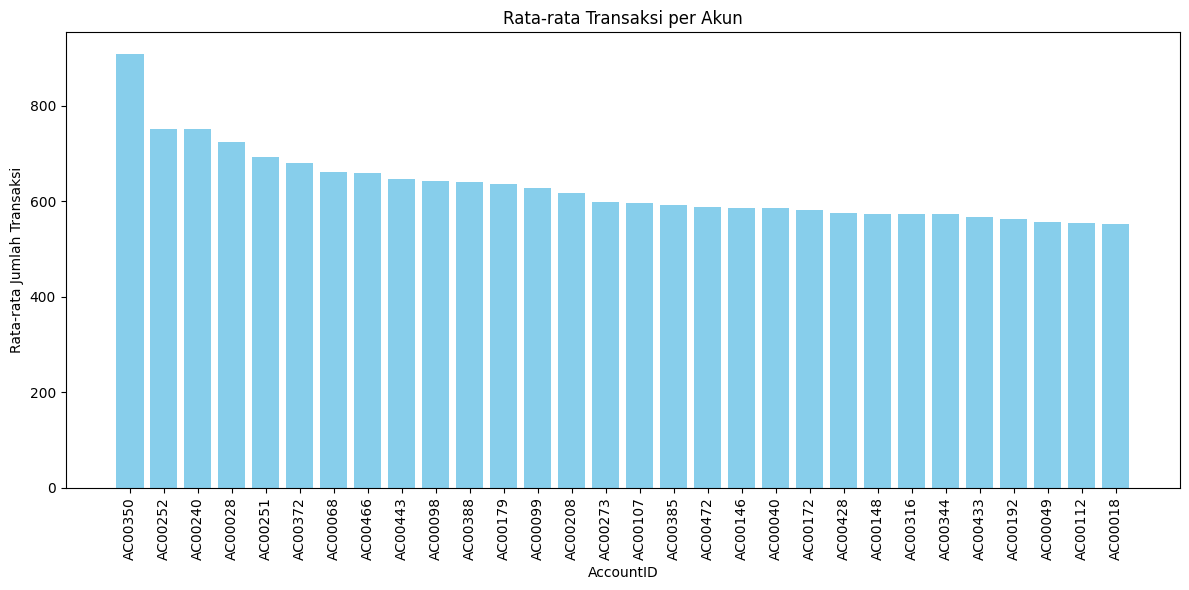

In [143]:
mean_transaction_df = mean_trasaction.reset_index()
top_mean = mean_transaction_df.sort_values(by='TransactionAmount', ascending=False).head(30)

# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(top_mean['AccountID'], top_mean['TransactionAmount'], color='skyblue')
plt.xlabel('AccountID')
plt.ylabel('Rata-rata Jumlah Transaksi')
plt.title('Rata-rata Transaksi per Akun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [144]:
mean_transaction_df.describe()

,TransactionAmount
count,495.000000
mean,293.825743
std,139.068248
min,7.080000
25%,199.191190
50%,278.742222
75%,363.245000
max,907.920000


In [145]:
Age_unique = doc.groupby('AccountID')['CustomerAge'].nunique()
print(Age_unique)

AccountID
AC00001    2
AC00002    7
AC00003    5
AC00004    9
AC00005    9
          ..
AC00496    3
AC00497    5
AC00498    8
AC00499    7
AC00500    4
Name: CustomerAge, Length: 495, dtype: int64


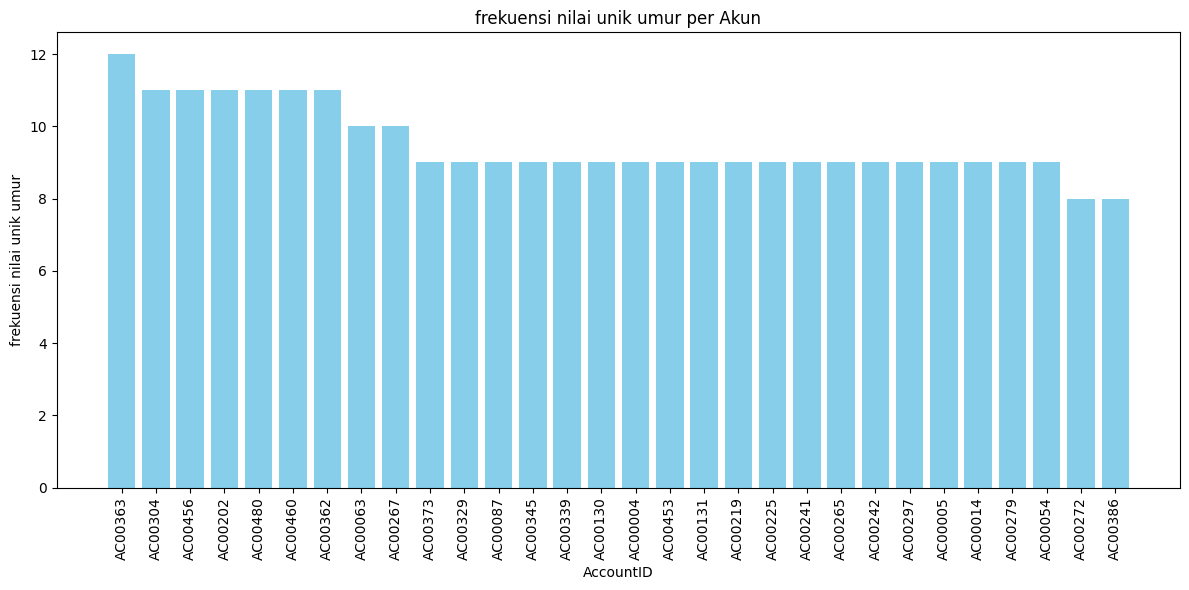

In [146]:
Age_unique_df = Age_unique.reset_index()
top_Age = Age_unique_df.sort_values(by='CustomerAge', ascending=False).head(30)

# Buat diagram batang
plt.figure(figsize=(12, 6))
plt.bar(top_Age['AccountID'], top_Age['CustomerAge'], color='skyblue')
plt.xlabel('AccountID')
plt.ylabel('frekuensi nilai unik umur')
plt.title('frekuensi nilai unik umur per Akun')
plt.xticks(rotation=90)  # Memutar label sumbu x agar tidak tumpang tindih
plt.tight_layout()
plt.show()

In [147]:
Age_unique_df.describe()

,CustomerAge
count,495.000000
mean,4.856566
std,2.160942
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,12.000000


In [148]:
count = Age_unique_df[Age_unique_df['CustomerAge'] == 1]
len(count['CustomerAge'].tolist())

25

In [149]:
doc[doc['AccountID'] == 'AC00001']

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1312,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2023-09-15 17:00:20
2016,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2023-11-14 16:56:34


AccountID sama tetapi kolom-kolom selanjutnya menandakan seperti orang yang berbeda

In [150]:
doc[doc['AccountID'] == 'AC00002'].sort_values(by='TransactionDate', ascending=True)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1673,TX001674,AC00002,331.66,2024-11-04 08:08:23,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30,2023-09-11 17:52:59
1476,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2023-05-05 16:35:44
20,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2023-02-28 16:36:58
1028,TX001029,AC00002,516.47,2024-11-04 08:09:51,Credit,Charlotte,D000420,59.132.247.252,M026,ATM,25,Student,94,1,1305.06,2023-12-21 17:00:50
2120,TX002121,AC00002,476.99,2024-11-04 08:10:10,Debit,San Diego,D000594,113.137.153.101,M022,Online,23,Student,187,1,1154.48,2023-01-10 16:00:32
61,TX000062,AC00002,263.99,2024-11-04 08:11:03,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2023-05-16 16:07:30
1598,TX001599,AC00002,395.16,2024-11-04 08:11:15,Debit,Milwaukee,D000269,165.38.56.205,M059,Online,56,Retired,17,1,5340.73,2023-07-24 16:14:05


In [151]:
doc[doc['AccountID'] == 'AC00496']

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
971,TX000972,AC00496,194.37,2024-11-04 08:09:28,Debit,Milwaukee,D000151,160.160.113.117,M024,ATM,66,Doctor,161,1,14395.88,2023-04-26 17:55:11
1500,TX001501,AC00496,342.57,2024-11-04 08:09:51,Debit,Boston,D000345,64.15.0.66,M100,Online,20,Student,91,1,339.16,2023-02-03 17:10:00
2196,TX002197,AC00496,58.94,2024-11-04 08:08:38,Debit,Miami,D000686,56.116.189.0,M046,Online,30,Engineer,26,1,4575.98,2023-01-16 16:16:42


In [152]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

dari 16 kolom, 11 diantaranya adalah kolom bertipe object

In [153]:
doc.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


tidak ada datanull

In [154]:
doc.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


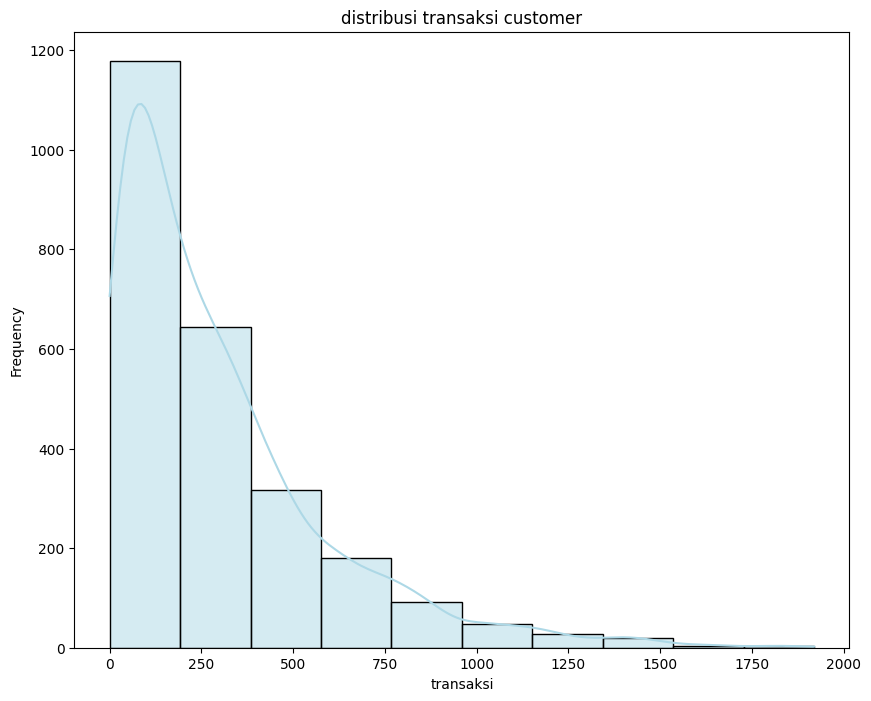

In [155]:
plt.figure(figsize=(10,8))
sns.histplot(doc['TransactionAmount'], bins=10, kde=True, color='lightblue')
plt.title('distribusi transaksi customer')
plt.xlabel('transaksi')
plt.ylabel('Frequency')
plt.show()

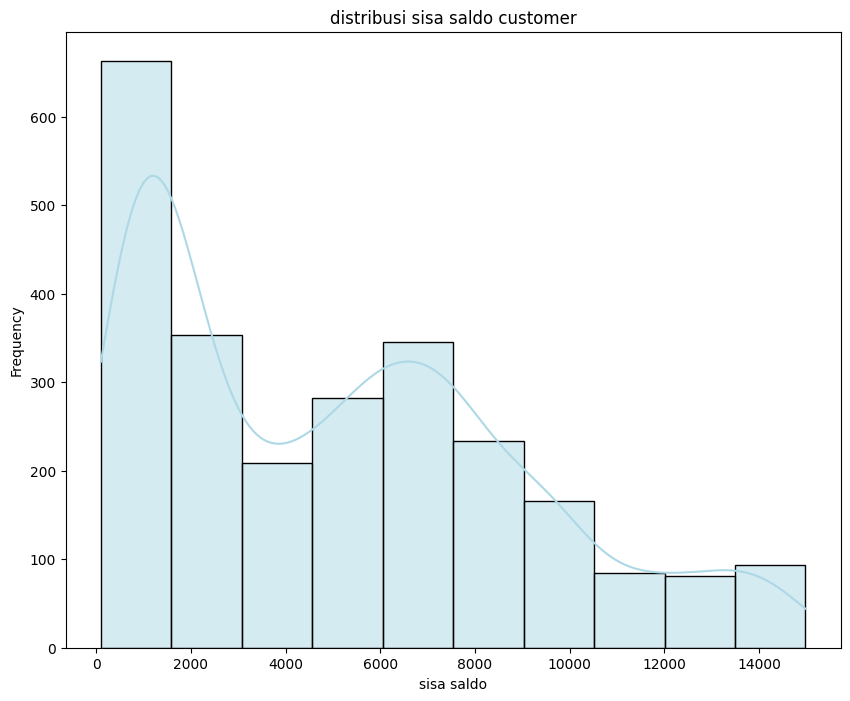

In [156]:
plt.figure(figsize=(10,8))
sns.histplot(doc['AccountBalance'], bins=10, kde=True, color='lightblue')
plt.title('distribusi sisa saldo customer')
plt.xlabel('sisa saldo')
plt.ylabel('Frequency')
plt.show()

In [157]:
transaksi = doc['AccountID'].value_counts()
sekali = transaksi[transaksi == 1].count()
lebih_dari_sekali = transaksi[transaksi > 1].count()

print(f"Jumlah AccountID yang melakukan transaksi sekali : {sekali}")
print(f"Jumlah AccountID yang melakukan transaksi lebih dari sekali : {lebih_dari_sekali}")

Jumlah AccountID yang melakukan transaksi sekali : 24
Jumlah AccountID yang melakukan transaksi lebih dari sekali : 471


In [158]:
okupasi = doc["CustomerOccupation"].value_counts()
okupasi

,count
CustomerOccupation,
Student,657
Doctor,631
Engineer,625
Retired,599


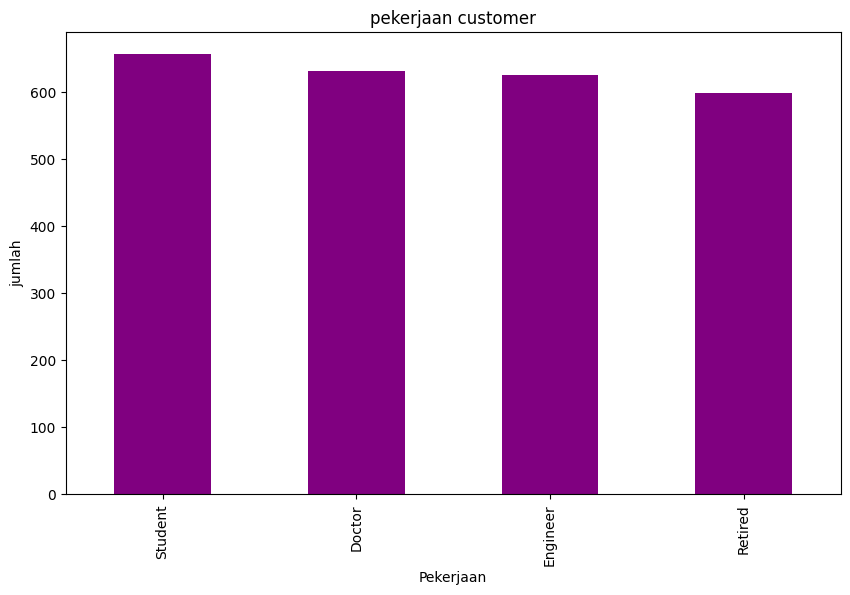

In [159]:
okupasi.plot(kind='bar', color='purple', figsize=(10,6))
plt.title('pekerjaan customer')
plt.xlabel('Pekerjaan')
plt.ylabel('jumlah')
plt.show()

In [160]:
tipe_transaksi = doc["TransactionType"].value_counts()
tipe_transaksi

,count
TransactionType,
Debit,1944
Credit,568


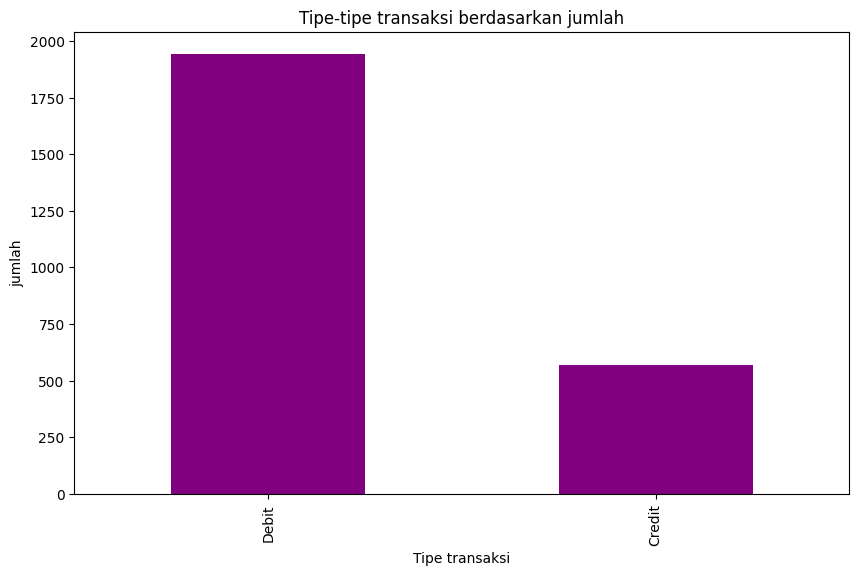

In [161]:
tipe_transaksi.plot(kind='bar', color='purple', figsize=(10,6))
plt.title('Tipe-tipe transaksi berdasarkan jumlah')
plt.xlabel('Tipe transaksi')
plt.ylabel('jumlah')
plt.show()

In [162]:
lokasi = doc["Location"].value_counts().count()
print(f"Jumlah lokasi yang berbeda : {lokasi}")

Jumlah lokasi yang berbeda : 43


In [163]:
kota = doc["Location"].value_counts()
kota

,count
Location,
Fort Worth,70
Los Angeles,69
Oklahoma City,68
Charlotte,68
Philadelphia,67
Tucson,67
Omaha,65
Miami,64
Memphis,63


In [164]:
doc['Location'].unique()

array(['San Diego', 'Houston', 'Mesa', 'Raleigh', 'Atlanta',
       'Oklahoma City', 'Seattle', 'Indianapolis', 'Detroit', 'Nashville',
       'Albuquerque', 'Memphis', 'Louisville', 'Denver', 'Austin',
       'Columbus', 'Los Angeles', 'Las Vegas', 'Fort Worth', 'Miami',
       'Milwaukee', 'Baltimore', 'New York', 'San Francisco', 'San Jose',
       'San Antonio', 'Philadelphia', 'Charlotte', 'Tucson', 'Chicago',
       'Sacramento', 'Kansas City', 'Omaha', 'Virginia Beach', 'Dallas',
       'Boston', 'Jacksonville', 'Phoenix', 'Washington', 'El Paso',
       'Colorado Springs', 'Fresno', 'Portland'], dtype=object)

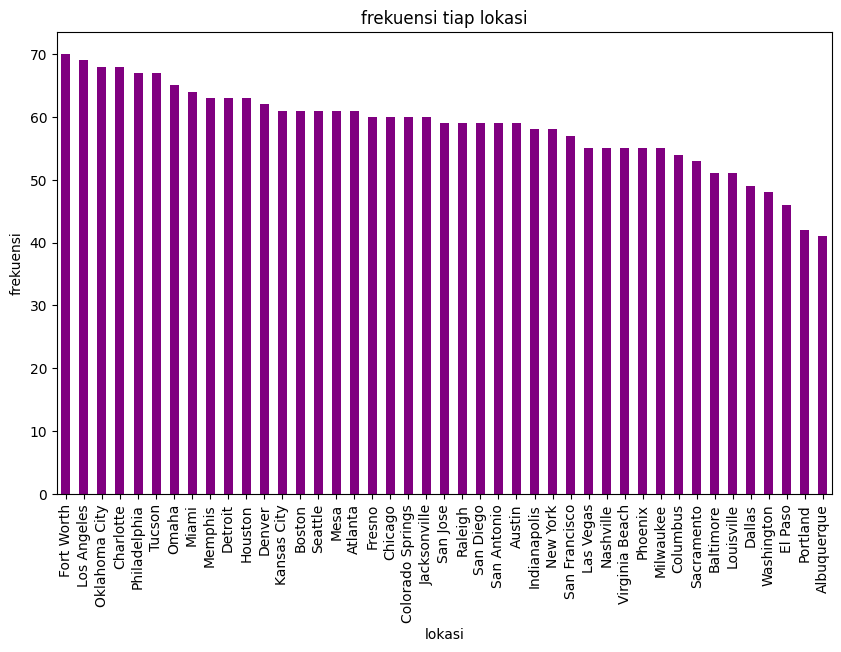

In [165]:
kota.plot(kind='bar', color='purple', figsize=(10,6))
plt.title('frekuensi tiap lokasi')
plt.xlabel('lokasi')
plt.ylabel('frekuensi')
plt.show()


In [166]:
umur = doc["CustomerAge"].value_counts()
umur

,count
CustomerAge,
27,87
26,86
25,73
28,68
21,64
...,...
77,19
73,19
80,17


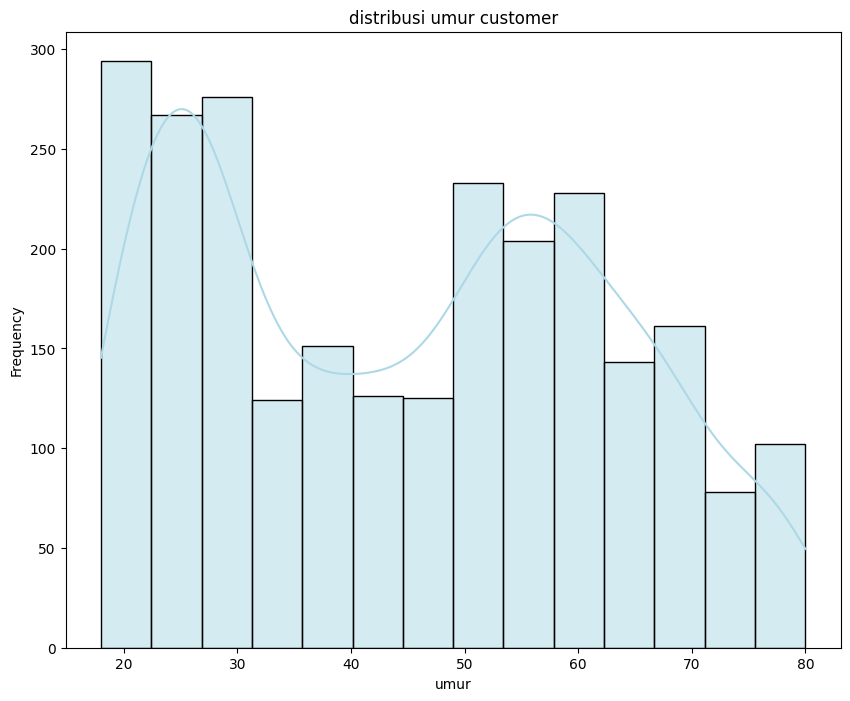

In [167]:
plt.figure(figsize=(10,8))
sns.histplot(doc['CustomerAge'], kde=True, color='lightblue')
plt.title('distribusi umur customer')
plt.xlabel('umur')
plt.ylabel('Frequency')
plt.show()

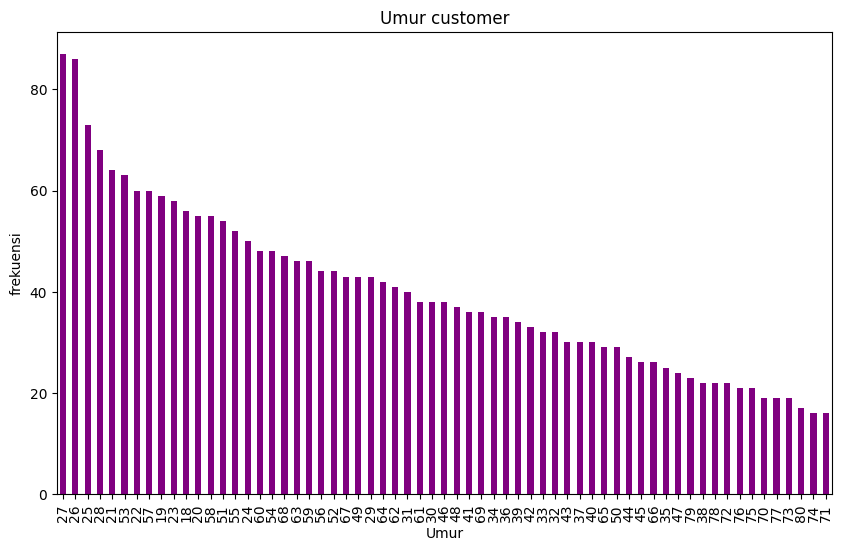

In [168]:
umur.plot(kind='bar', color='purple', figsize=(10,6))
plt.title('Umur customer')
plt.xlabel('Umur')
plt.ylabel('frekuensi')
plt.show()

In [169]:
doc['LoginAttempts'].value_counts()

,count
LoginAttempts,
1,2390
5,32
4,32
3,31
2,27


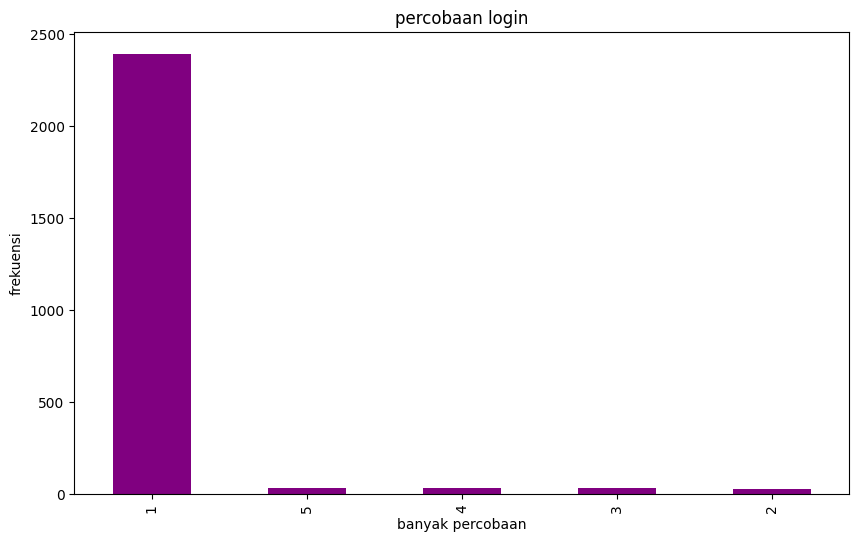

In [170]:
doc['LoginAttempts'].value_counts().plot(kind='bar', color='purple', figsize=(10,6))
plt.title('percobaan login')
plt.xlabel('banyak percobaan')
plt.ylabel('frekuensi')
plt.show()

In [171]:
doc['TransactionDuration'].value_counts()

,count
TransactionDuration,
63,26
31,21
109,21
146,20
37,20
...,...
262,1
242,1
298,1


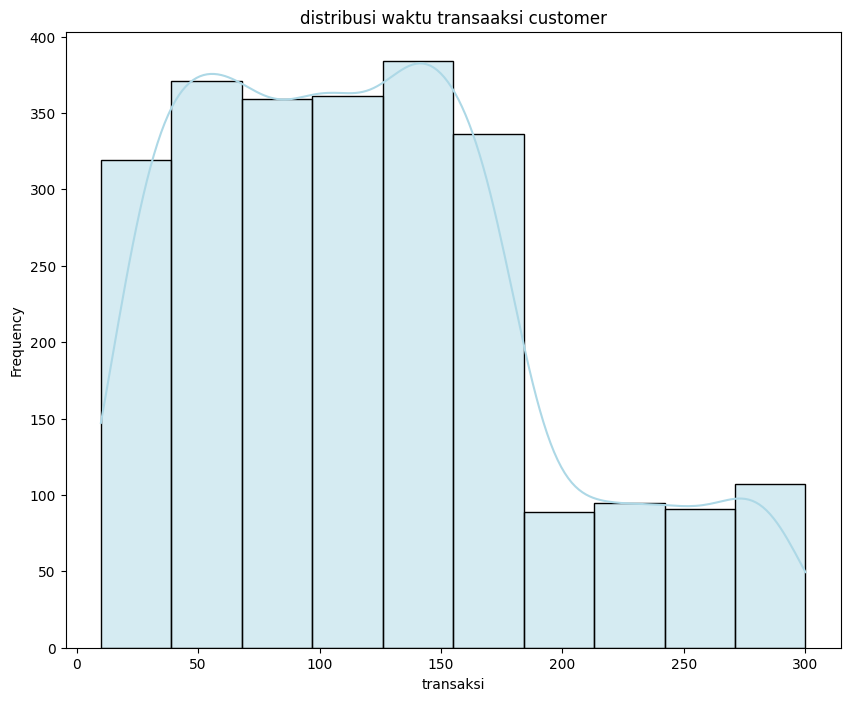

In [172]:
plt.figure(figsize=(10,8))
sns.histplot(doc['TransactionDuration'], bins=10, kde=True, color='lightblue')
plt.title('distribusi waktu transaaksi customer')
plt.xlabel('transaksi')
plt.ylabel('Frequency')
plt.show()

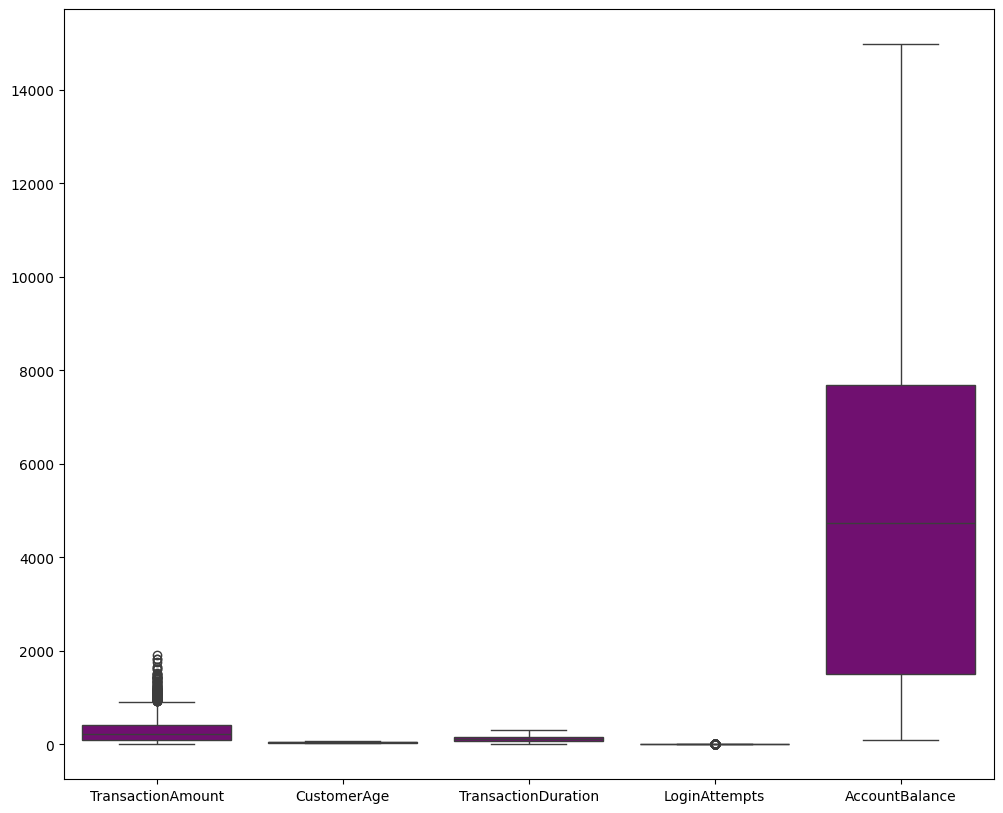

In [173]:
plt.figure(figsize=(12,10))
sns.boxplot(doc, color='purple')
plt.show()

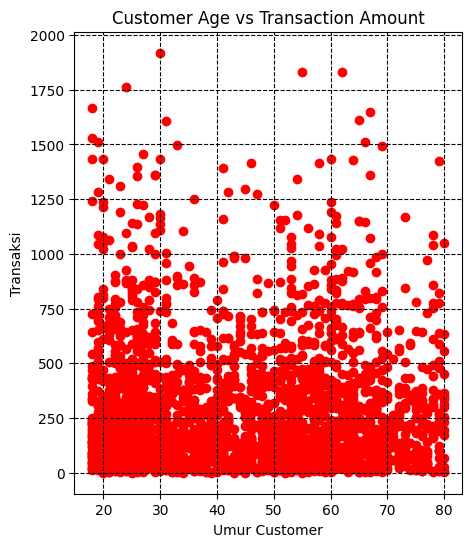

In [174]:
plt.figure(figsize=(5,6))
plt.scatter(doc['CustomerAge'], doc['TransactionAmount'] ,color='red')
plt.title('Customer Age vs Transaction Amount')
plt.xlabel('Umur Customer')
plt.ylabel('Transaksi')
plt.grid(color='black', linestyle='--')
plt.show()

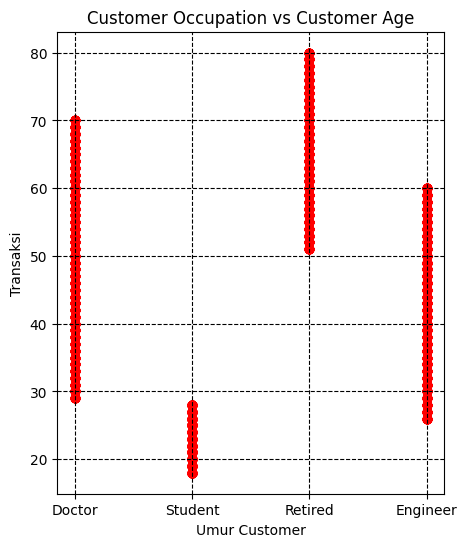

In [175]:
plt.figure(figsize=(5,6))
plt.scatter(doc['CustomerOccupation'], doc['CustomerAge'], color='red')
plt.title('Customer Occupation vs Customer Age')
plt.xlabel('Umur Customer')
plt.ylabel('Transaksi')
plt.grid(color='black', linestyle='--')
plt.show()

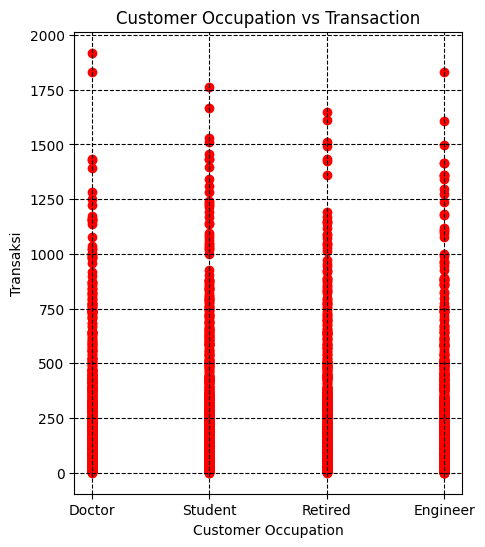

In [176]:
plt.figure(figsize=(5,6))
plt.scatter(doc['CustomerOccupation'], doc['TransactionAmount'], color='red')
plt.title('Customer Occupation vs Transaction')
plt.xlabel('Customer Occupation')
plt.ylabel('Transaksi')
plt.grid(color='black', linestyle='--')
plt.show()

menghitung rata-rata transaksi tiap akun

In [177]:
doc.groupby('AccountID')['TransactionAmount'].mean()

,TransactionAmount
AccountID,
AC00001,130.380000
AC00002,293.744286
AC00003,253.268000
AC00004,242.231111
AC00005,347.974444
...,...
AC00496,198.626667
AC00497,197.868333
AC00498,381.377500


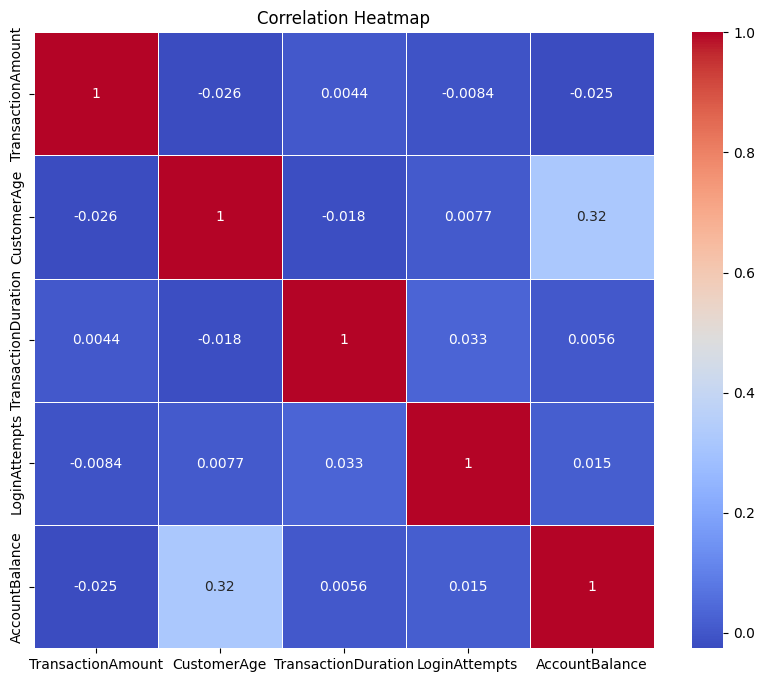

In [178]:
numerical_features = doc.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Preprosessing

Dataset yang dimiliki ternyata tidak mengurutkan data secara kronologis sehingga perlu mengubah urutan data dalam dataset menjadi kronologis

## menyusun ulang dataset

In [179]:
df = doc.copy()

In [180]:
df_1 = df.copy()

In [181]:
df_1 = df_1.sort_values(by=['AccountID', 'PreviousTransactionDate'], ascending=True)

In [182]:
df_1

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1312,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2023-09-15 17:00:20
2016,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2023-11-14 16:56:34
2120,TX002121,AC00002,476.99,2024-11-04 08:10:10,Debit,San Diego,D000594,113.137.153.101,M022,Online,23,Student,187,1,1154.48,2023-01-10 16:00:32
20,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2023-02-28 16:36:58
1476,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2023-05-05 16:35:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,TX001943,AC00499,837.29,2024-11-04 08:07:12,Debit,Phoenix,D000189,217.233.219.196,M002,Branch,25,Student,216,1,6012.67,2023-11-27 16:14:25
2054,TX002055,AC00500,156.86,2024-11-04 08:10:27,Debit,Charlotte,D000168,11.167.243.171,M099,ATM,51,Doctor,102,1,14453.35,2023-01-30 16:37:53
1715,TX001716,AC00500,225.93,2024-11-04 08:08:39,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27,2023-03-13 17:57:47
2374,TX002375,AC00500,129.62,2024-11-04 08:06:51,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28,2023-07-06 16:47:00


In [183]:
x = df_1['PreviousTransactionDate'].reset_index(drop=True)
x

,PreviousTransactionDate
0,2023-09-15 17:00:20
1,2023-11-14 16:56:34
2,2023-01-10 16:00:32
3,2023-02-28 16:36:58
4,2023-05-05 16:35:44
...,...
2507,2023-11-27 16:14:25
2508,2023-01-30 16:37:53
2509,2023-03-13 17:57:47
2510,2023-07-06 16:47:00


In [184]:
df = df.sort_values(by=['AccountID', 'TransactionDate'], ascending=True).reset_index(drop=True)

In [185]:
df = df.drop('PreviousTransactionDate', axis=1)

In [186]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40
1,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92
2,TX001674,AC00002,331.66,2024-11-04 08:08:23,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30
3,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47
4,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX001729,AC00499,40.03,2024-11-04 08:12:08,Debit,Omaha,D000210,34.125.226.63,M086,Branch,23,Student,200,1,6408.80
2508,TX002375,AC00500,129.62,2024-11-04 08:06:51,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28
2509,TX002350,AC00500,134.55,2024-11-04 08:08:25,Debit,San Jose,D000219,100.137.90.188,M026,Online,59,Doctor,165,1,14852.42
2510,TX001716,AC00500,225.93,2024-11-04 08:08:39,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27


## dataset yang sudah fix

In [187]:
df = pd.concat([df, x], axis=1)
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2023-09-15 17:00:20
1,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2023-11-14 16:56:34
2,TX001674,AC00002,331.66,2024-11-04 08:08:23,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30,2023-01-10 16:00:32
3,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2023-02-28 16:36:58
4,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2023-05-05 16:35:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX001729,AC00499,40.03,2024-11-04 08:12:08,Debit,Omaha,D000210,34.125.226.63,M086,Branch,23,Student,200,1,6408.80,2023-11-27 16:14:25
2508,TX002375,AC00500,129.62,2024-11-04 08:06:51,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28,2023-01-30 16:37:53
2509,TX002350,AC00500,134.55,2024-11-04 08:08:25,Debit,San Jose,D000219,100.137.90.188,M026,Online,59,Doctor,165,1,14852.42,2023-03-13 17:57:47
2510,TX001716,AC00500,225.93,2024-11-04 08:08:39,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27,2023-07-06 16:47:00


In [188]:
df_final = df.copy()

In [189]:
df_yang_dipakai = df.copy()

In [190]:
df_yang_dipakai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## Encoding

In [191]:
df_yang_dipakai = df_yang_dipakai.drop(['TransactionID'], axis=1)

### Mengubah Tanggal ke Datetime dan menghitung selisihnya

In [192]:
df_yang_dipakai['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df_yang_dipakai['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [193]:
# Geser lokasi sebelumnya per akun
df_yang_dipakai['next_transaction'] = df_yang_dipakai.groupby('AccountID')['TransactionDate'].shift(1)

df_yang_dipakai['time_deff'] = (df_yang_dipakai['next_transaction'] - df_yang_dipakai['TransactionDate']).dt.total_seconds().abs()


In [194]:
# Geser lokasi sebelumnya per akun
#df['Previous_next_transaction'] = df.groupby('AccountID')['PreviousTransactionDate'].shift(1)

#df['time_deff_2'] = (df['Previous_next_transaction'] - df['PreviousTransactionDate']).abs().dt.total_seconds()


In [195]:
df_yang_dipakai = df_yang_dipakai.drop(['next_transaction', 'PreviousTransactionDate', 'TransactionDate'], axis=1)

In [196]:
df_yang_dipakai['time_deff'].fillna(0, inplace=True)
#df['time_deff_2'].fillna(0, inplace=True)

### Menambahkan kolom Rata-Rata Transaksi

In [197]:
df_yang_dipakai = df_yang_dipakai.merge(mean_trasaction, on='AccountID', how='left')

In [198]:
df_yang_dipakai = df_yang_dipakai.rename(columns={'TransactionAmount_x': 'TransactionAmount', 'TransactionAmount_y': 'Mean_Transaction'})

### Menentukan adanya Lokasi yang berpindah secara mencurigakan

In [199]:
#df_yang_dipakai['next_location'] = df_yang_dipakai.groupby('AccountID')['Location'].shift(1)
#df_yang_dipakai['Location_change'] = (df_yang_dipakai['next_location'] != df_yang_dipakai['Location']).astype(bool)
#df_yang_dipakai['Suspicious_Move'] = (df_yang_dipakai['Location_change'] & (df_yang_dipakai['time_deff'] < 1800)).astype(bool)
#df_yang_dipakai = df_yang_dipakai.drop(['next_location'], axis=1)

### Menambahkan Kolom new MerchantID, IP, Device

#### New Merchant

In [200]:
# Geser Merchant sebelumnya per akun
#df_yang_dipakai['new_merchant'] = df_yang_dipakai.groupby('AccountID')['MerchantID'].shift(1)

# Cek Apakah terjadi Perubahan merchant
#df_yang_dipakai['merchant_change'] = (df_yang_dipakai['new_merchant'] != df_yang_dipakai['MerchantID']).astype(bool)

#df_yang_dipakai = df_yang_dipakai.drop(['new_merchant'], axis=1)

#### New IP

In [201]:
# Geser Merchant sebelumnya per akun
#df_yang_dipakai['new_IP'] = df_yang_dipakai.groupby('AccountID')['IP Address'].shift(1)

# Cek Apakah terjadi Perubahan merchant
#df_yang_dipakai['IP_change'] = (df_yang_dipakai['new_IP'] != df_yang_dipakai['IP Address']).astype(bool)

#df_yang_dipakai = df_yang_dipakai.drop(['new_IP'], axis=1)

#### New Device

In [202]:
# Geser Merchant sebelumnya per akun
#df_yang_dipakai['new_Device'] = df_yang_dipakai.groupby('AccountID')['DeviceID'].shift(1)

# Cek Apakah terjadi Perubahan merchant
#df_yang_dipakai['Device_change'] = (df_yang_dipakai['new_Device'] != df['DeviceID']).astype(bool)

#df_yang_dipakai = df_yang_dipakai.drop(['new_Device'], axis=1)

### Kolom Mean Account Balance

In [203]:
Mean_Account_Balance = df_yang_dipakai.groupby('AccountID')['AccountBalance'].mean()

In [204]:
df_yang_dipakai['Mean_Account_Balance'] = df_yang_dipakai['AccountID'].map(Mean_Account_Balance)

In [205]:
df_yang_dipakai

,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,time_deff,Mean_Transaction,Mean_Account_Balance
0,AC00001,212.97,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,0.0,130.380000,2915.160000
1,AC00001,47.79,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,73.0,130.380000,2915.160000
2,AC00002,331.66,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30,0.0,293.744286,4480.421429
3,AC00002,12.62,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,40.0,293.744286,4480.421429
4,AC00002,59.32,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,21.0,293.744286,4480.421429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,AC00499,40.03,Debit,Omaha,D000210,34.125.226.63,M086,Branch,23,Student,200,1,6408.80,87.0,331.612857,4450.577143
2508,AC00500,129.62,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28,0.0,161.740000,7947.580000
2509,AC00500,134.55,Debit,San Jose,D000219,100.137.90.188,M026,Online,59,Doctor,165,1,14852.42,94.0,161.740000,7947.580000
2510,AC00500,225.93,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27,14.0,161.740000,7947.580000


### One-Hot-Encoder

In [206]:
from sklearn.preprocessing import OneHotEncoder

# Ambil kolom object
cat_cols = df_yang_dipakai.select_dtypes(include=['object']).columns.tolist()

# Buat encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df_yang_dipakai[cat_cols])

# Transform data
encoded_array = encoder.transform(df_yang_dipakai[cat_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# Gabungkan dengan kolom numerik
df_numerik = df_yang_dipakai.drop(columns=cat_cols)
df_encoded = pd.concat([df_numerik.reset_index(drop=True), encoded_df], axis=1)


In [207]:
column_object = df_yang_dipakai.select_dtypes(include=['object']).columns
if column_object.dtype == 'object':
    df_encoded = pd.get_dummies(df_yang_dipakai, columns=column_object)

In [208]:
df_encoded

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,time_deff,Mean_Transaction,Mean_Account_Balance,AccountID_AC00001,AccountID_AC00002,...,MerchantID_M098,MerchantID_M099,MerchantID_M100,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,212.97,59,178,1,4180.40,0.0,130.380000,2915.160000,True,False,...,False,False,False,False,False,True,False,True,False,False
1,47.79,25,37,1,1649.92,73.0,130.380000,2915.160000,True,False,...,False,False,False,False,True,False,False,False,False,True
2,331.66,76,145,1,7216.30,0.0,293.744286,4480.421429,False,True,...,False,False,False,True,False,False,False,False,True,False
3,12.62,33,61,1,6420.47,40.0,293.744286,4480.421429,False,True,...,False,False,False,False,True,False,True,False,False,False
4,59.32,71,38,1,5750.89,21.0,293.744286,4480.421429,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,40.03,23,200,1,6408.80,87.0,331.612857,4450.577143,False,False,...,False,False,False,False,True,False,False,False,False,True
2508,129.62,23,124,1,620.28,0.0,161.740000,7947.580000,False,False,...,False,False,False,True,False,False,False,False,False,True
2509,134.55,59,165,1,14852.42,94.0,161.740000,7947.580000,False,False,...,False,False,False,False,False,True,True,False,False,False
2510,225.93,25,199,1,1864.27,14.0,161.740000,7947.580000,False,False,...,False,False,False,False,True,False,False,False,False,True


In [209]:
#print(df_encoded.dtypes[df_encoded.dtypes == 'object'])  # Untuk melihat kolom object

In [210]:
#df_encoded = df_encoded.astype(float)

#Normalisasi/Standarisasi

In [211]:
#from sklearn.preprocessing import MaxAbsScaler

#scaler = MaxAbsScaler()
#df_scaled = scaler.fit_transform(df_encoded)  # df_encoded dari get_dummies()


In [212]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [213]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df_encoded)

In [214]:
df_scaled

array([[-0.28991853,  0.80534666,  0.8342649 , ...,  1.73758453,
        -0.55957194, -0.59512847],
       [-0.85582028, -1.10598375, -1.18146552, ..., -0.57551157,
        -0.55957194,  1.68030946],
       [ 0.11670986,  1.76101187,  0.36249821, ..., -0.57551157,
         1.78708033, -0.59512847],
       ...,
       [-0.55858311,  0.80534666,  0.64841742, ..., -0.57551157,
        -0.55957194, -0.59512847],
       [-0.24551796, -1.10598375,  1.13448007, ..., -0.57551157,
        -0.55957194,  1.68030946],
       [-0.48214972,  0.35562186, -0.25222809, ..., -0.57551157,
        -0.55957194, -0.59512847]])

# Dimension Reduction

In [215]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(df_scaled)
svd = TruncatedSVD(n_components=2,random_state=42)
df_reduced = svd.fit_transform(sparse_matrix)


In [216]:
#svd_vis = TruncatedSVD(n_components=2)
#df_reduced = svd_vis.fit_transform(df_reduced)  # df_reduced dari SVD awal (20D)

In [217]:
df_reduced

array([[-2.1348191 , -2.93959804],
       [-3.55229385, -3.45004195],
       [ 1.17230811, -0.79236696],
       ...,
       [ 3.91680571, -0.80556171],
       [ 0.13644933,  1.528237  ],
       [ 3.07450869, -3.0810036 ]])

# Modeling

In [218]:
from sklearn.cluster import DBSCAN

# Simpan hasil
results = []

# Grid dari nilai eps dan min_samples
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(3, 10)

# Loop kombinasi
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(df_reduced)

        # Hitung jumlah kluster (tidak termasuk noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Simpan hasil
        results.append({
            'eps': round(eps, 2),
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise
        })

# Buat DataFrame hasil
df_results = pd.DataFrame(results)

# Buat pivot: baris=eps, kolom=min_samples, nilai=n_clusters
pivot_table = df_results.pivot(index='eps', columns='min_samples', values='n_clusters')
print(pivot_table)


min_samples    3    4   5   6   7   8   9
eps                                      
0.1          195  124  79  50  36  25  12
0.2           46   37  26  37  30  26  23
0.3           16   12   9   5   3   3   5
0.4           10    3   3   4   4   3   1
0.5            6    3   1   1   1   2   2
0.6            3    4   3   2   1   1   1
0.7            2    3   1   1   1   1   1
0.8            2    2   2   1   1   1   1
0.9            2    2   1   1   1   1   1


## Banyak Kluster

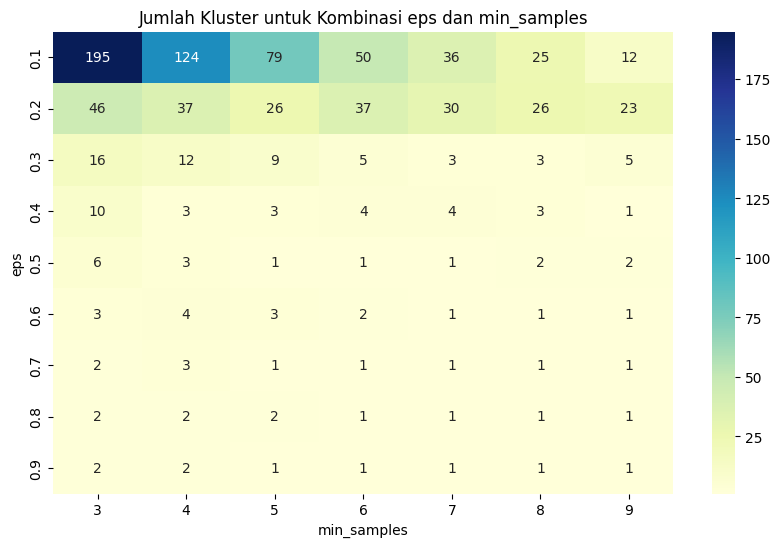

In [219]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Jumlah Kluster untuk Kombinasi eps dan min_samples')
plt.ylabel('eps')
plt.xlabel('min_samples')
plt.show()

## Atur Parameter

In [220]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=3)
labels = dbscan.fit_predict(df_reduced)

## Grafik Kluster

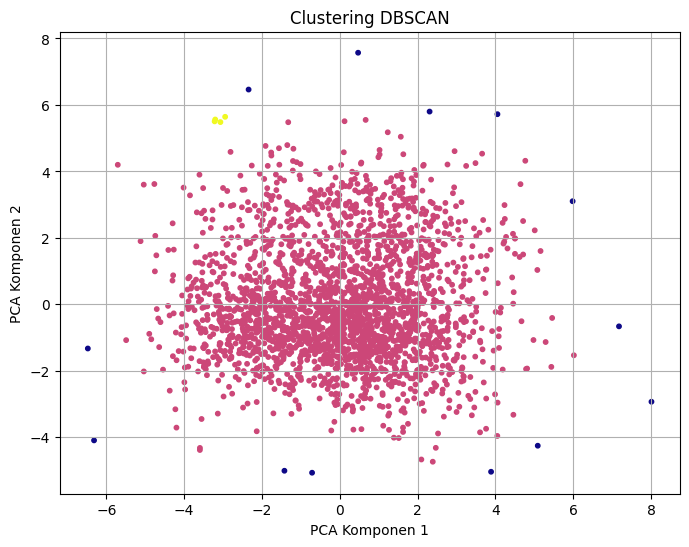

In [221]:
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=labels, cmap='plasma', s=10)
plt.title("Clustering DBSCAN")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.show()

## Skor Silhouette

In [222]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_reduced, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4372453236665578


## Jumlah Kluster dan Outliers

In [223]:
# Hitung jumlah cluster (label unik, kecuali -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Hitung jumlah outlier (label -1)
n_noise = list(labels).count(-1)

print(f"Jumlah cluster yang ditemukan DBSCAN: {n_clusters}")
print(f"Jumlah data yang dianggap noise (outlier): {n_noise}")


Jumlah cluster yang ditemukan DBSCAN: 2
Jumlah data yang dianggap noise (outlier): 13


In [224]:
target = pd.DataFrame(labels)

In [225]:
target.value_counts()


,count
0,
0,2495
-1,13
1,4


In [226]:
target = target.rename(columns={0: 'Kluster'})

In [227]:
df_final = pd.concat([df, target], axis=1)

#Dataset Asli + Label

In [228]:
df_final

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Kluster
0,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2023-09-15 17:00:20,0
1,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2023-11-14 16:56:34,0
2,TX001674,AC00002,331.66,2024-11-04 08:08:23,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30,2023-01-10 16:00:32,0
3,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2023-02-28 16:36:58,0
4,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2023-05-05 16:35:44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX001729,AC00499,40.03,2024-11-04 08:12:08,Debit,Omaha,D000210,34.125.226.63,M086,Branch,23,Student,200,1,6408.80,2023-11-27 16:14:25,0
2508,TX002375,AC00500,129.62,2024-11-04 08:06:51,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28,2023-01-30 16:37:53,0
2509,TX002350,AC00500,134.55,2024-11-04 08:08:25,Debit,San Jose,D000219,100.137.90.188,M026,Online,59,Doctor,165,1,14852.42,2023-03-13 17:57:47,0
2510,TX001716,AC00500,225.93,2024-11-04 08:08:39,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27,2023-07-06 16:47:00,0


# Melihat Tiap Kluster

In [229]:
df_kluster_1 = df_final[df_final['Kluster'] == 1]
df_kluster_0 = df_final[df_final['Kluster'] == 0]
df_kluster_outliers = df_final[df_final['Kluster'] == -1]

## Kluster 0

In [230]:
df_kluster_0.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Kluster
0,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2023-09-15 17:00:20,0
1,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2023-11-14 16:56:34,0
2,TX001674,AC00002,331.66,2024-11-04 08:08:23,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30,2023-01-10 16:00:32,0
3,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2023-02-28 16:36:58,0
4,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2023-05-05 16:35:44,0


### Jumlah Value Tiap Kolom di Kluster 0

In [231]:
for col in df_kluster_0.columns:
    print(df_kluster_0[col].value_counts())
    print()

TransactionID
TX002055    1
TX002017    1
TX001313    1
TX001674    1
TX001477    1
           ..
TX000223    1
TX001851    1
TX002328    1
TX001820    1
TX002391    1
Name: count, Length: 2495, dtype: int64

AccountID
AC00460    12
AC00363    12
AC00202    12
AC00362    12
AC00456    11
           ..
AC00044     1
AC00440     1
AC00221     1
AC00025     1
AC00008     1
Name: count, Length: 491, dtype: int64

TransactionAmount
11.46     3
74.11     2
21.40     2
76.39     2
233.74    2
         ..
106.99    1
41.51     1
577.73    1
22.61     1
39.21     1
Name: count, Length: 2438, dtype: int64

TransactionDate
2024-11-04 08:09:17    16
2024-11-04 08:11:10    15
2024-11-04 08:07:18    15
2024-11-04 08:07:24    13
2024-11-04 08:07:50    13
                       ..
2024-11-04 08:09:10     2
2024-11-04 08:11:04     2
2024-11-04 08:06:55     2
2024-11-04 08:06:43     2
2024-11-04 08:06:57     1
Name: count, Length: 360, dtype: int64

TransactionType
Debit     1936
Credit     559
Name: co

## Kluster 1

In [232]:
df_kluster_1

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Kluster
252,TX001758,AC00050,326.03,2024-11-04 08:11:46,Credit,New York,D000145,129.108.48.116,M038,Online,18,Student,137,1,290.24,2023-08-11 17:27:16,1
253,TX000932,AC00050,38.81,2024-11-04 08:12:12,Credit,Virginia Beach,D000285,120.32.147.210,M001,Online,25,Student,145,1,1619.60,2023-11-09 16:11:59,1
1226,TX002119,AC00248,746.78,2024-11-04 08:07:44,Credit,Mesa,D000243,112.66.191.48,M001,Branch,21,Student,64,1,1699.81,2023-04-11 17:18:50,1
1275,TX001032,AC00258,66.69,2024-11-04 08:07:16,Credit,San Antonio,D000624,52.50.209.49,M043,Branch,25,Student,140,1,1210.33,2023-03-02 16:11:53,1


### Jumlah Value Tiap Kolom di Kluster 1

In [233]:
for col in df_kluster_1.columns:
    print(df_kluster_1[col].value_counts())
    print()

TransactionID
TX001758    1
TX000932    1
TX002119    1
TX001032    1
Name: count, dtype: int64

AccountID
AC00050    2
AC00248    1
AC00258    1
Name: count, dtype: int64

TransactionAmount
326.03    1
38.81     1
746.78    1
66.69     1
Name: count, dtype: int64

TransactionDate
2024-11-04 08:11:46    1
2024-11-04 08:12:12    1
2024-11-04 08:07:44    1
2024-11-04 08:07:16    1
Name: count, dtype: int64

TransactionType
Credit    4
Name: count, dtype: int64

Location
New York          1
Virginia Beach    1
Mesa              1
San Antonio       1
Name: count, dtype: int64

DeviceID
D000145    1
D000285    1
D000243    1
D000624    1
Name: count, dtype: int64

IP Address
129.108.48.116    1
120.32.147.210    1
112.66.191.48     1
52.50.209.49      1
Name: count, dtype: int64

MerchantID
M001    2
M038    1
M043    1
Name: count, dtype: int64

Channel
Online    2
Branch    2
Name: count, dtype: int64

CustomerAge
25    2
18    1
21    1
Name: count, dtype: int64

CustomerOccupation
Stude

## Kluster OutLiers

In [234]:
df_kluster_outliers

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Kluster
138,TX001807,AC00025,350.11,2024-11-04 08:08:12,Credit,Raleigh,D000510,24.181.236.233,M050,Online,74,Retired,178,1,4639.04,2023-03-13 17:10:34,-1
573,TX001563,AC00112,554.15,2024-11-04 08:12:11,Debit,Raleigh,D000087,151.247.130.190,M066,ATM,49,Doctor,108,1,14817.22,2023-04-18 17:17:37,-1
581,TX000561,AC00114,27.07,2024-11-04 08:09:57,Credit,Virginia Beach,D000046,52.169.116.164,M004,Branch,80,Retired,39,1,3773.29,2023-10-23 16:50:33,-1
594,TX000044,AC00117,55.32,2024-11-04 08:08:03,Debit,Tucson,D000197,173.135.78.201,M009,ATM,19,Student,117,1,241.79,2023-04-12 16:03:37,-1
682,TX001857,AC00134,49.59,2024-11-04 08:09:56,Debit,Boston,D000679,18.92.67.57,M089,Branch,48,Engineer,147,1,6037.03,2023-08-25 16:45:20,-1
856,TX000342,AC00171,26.06,2024-11-04 08:12:00,Debit,San Diego,D000689,140.212.253.222,M096,ATM,65,Doctor,283,1,12893.63,2023-12-21 17:56:04,-1
905,TX000828,AC00180,108.96,2024-11-04 08:06:40,Debit,Milwaukee,D000240,49.31.186.82,M070,ATM,26,Student,247,1,7597.66,2023-10-10 18:12:07,-1
959,TX002283,AC00191,372.08,2024-11-04 08:12:15,Debit,Houston,D000470,102.203.223.1,M032,Branch,66,Doctor,63,1,13330.74,2023-12-28 18:53:29,-1
1180,TX000568,AC00240,350.14,2024-11-04 08:08:40,Credit,Los Angeles,D000182,161.168.126.136,M048,Online,75,Retired,38,1,2403.25,2023-08-25 17:26:27,-1
1803,TX001025,AC00361,126.60,2024-11-04 08:08:35,Debit,San Antonio,D000634,221.206.44.63,M031,Branch,22,Student,146,1,961.65,2023-05-26 16:00:45,-1


### Jumlah Value Tiap Kolom di Kluster Outliers

In [235]:
for col in df_kluster_outliers.columns:
    print(df_kluster_outliers[col].value_counts())
    print()

TransactionID
TX001807    1
TX001563    1
TX000561    1
TX000044    1
TX001857    1
TX000342    1
TX000828    1
TX002283    1
TX000568    1
TX001025    1
TX000672    1
TX001702    1
TX000157    1
Name: count, dtype: int64

AccountID
AC00025    1
AC00112    1
AC00114    1
AC00117    1
AC00134    1
AC00171    1
AC00180    1
AC00191    1
AC00240    1
AC00361    1
AC00372    1
AC00411    1
AC00421    1
Name: count, dtype: int64

TransactionAmount
350.11    1
554.15    1
27.07     1
55.32     1
49.59     1
26.06     1
108.96    1
372.08    1
350.14    1
126.60    1
986.81    1
111.55    1
93.26     1
Name: count, dtype: int64

TransactionDate
2024-11-04 08:08:12    1
2024-11-04 08:12:11    1
2024-11-04 08:09:57    1
2024-11-04 08:08:03    1
2024-11-04 08:09:56    1
2024-11-04 08:12:00    1
2024-11-04 08:06:40    1
2024-11-04 08:12:15    1
2024-11-04 08:08:40    1
2024-11-04 08:08:35    1
2024-11-04 08:09:09    1
2024-11-04 08:08:09    1
2024-11-04 08:12:04    1
Name: count, dtype: int64

Tr

# Menentukan Fraud dan Non-Fraud

In [236]:
df_final['Kluster'] = df_final['Kluster'].replace({0 : 'Fraud', 1 : 'Non-Fraud', -1 : 'Non-Fraud'})

# Very Final

In [237]:
df_final

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Kluster
0,TX002017,AC00001,212.97,2024-11-04 08:10:42,Debit,Atlanta,D000492,45.241.13.208,M003,Online,59,Engineer,178,1,4180.40,2023-09-15 17:00:20,Fraud
1,TX001313,AC00001,47.79,2024-11-04 08:11:55,Debit,Denver,D000649,59.12.96.11,M034,Branch,25,Student,37,1,1649.92,2023-11-14 16:56:34,Fraud
2,TX001674,AC00002,331.66,2024-11-04 08:08:23,Debit,Las Vegas,D000041,1.198.76.182,M040,ATM,76,Retired,145,1,7216.30,2023-01-10 16:00:32,Fraud
3,TX001477,AC00002,12.62,2024-11-04 08:09:03,Debit,El Paso,D000475,93.160.83.196,M068,Branch,33,Doctor,61,1,6420.47,2023-02-28 16:36:58,Fraud
4,TX000021,AC00002,59.32,2024-11-04 08:09:24,Debit,Los Angeles,D000152,116.44.12.250,M040,Branch,71,Retired,38,1,5750.89,2023-05-05 16:35:44,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX001729,AC00499,40.03,2024-11-04 08:12:08,Debit,Omaha,D000210,34.125.226.63,M086,Branch,23,Student,200,1,6408.80,2023-11-27 16:14:25,Fraud
2508,TX002375,AC00500,129.62,2024-11-04 08:06:51,Credit,San Jose,D000179,37.143.57.20,M070,ATM,23,Student,124,1,620.28,2023-01-30 16:37:53,Fraud
2509,TX002350,AC00500,134.55,2024-11-04 08:08:25,Debit,San Jose,D000219,100.137.90.188,M026,Online,59,Doctor,165,1,14852.42,2023-03-13 17:57:47,Fraud
2510,TX001716,AC00500,225.93,2024-11-04 08:08:39,Credit,Omaha,D000142,147.114.91.132,M097,Branch,25,Student,199,1,1864.27,2023-07-06 16:47:00,Fraud


In [238]:
df_final['Kluster'].value_counts()

,count
Kluster,
Fraud,2495
Non-Fraud,17


# Simpan Model

## Simpan Model-model Preprocessing

In [240]:
import joblib

joblib.dump(df_encoded, 'onehot_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(svd, 'svd.pkl')
joblib.dump(dbscan, 'dbscan.pkl')


['dbscan.pkl']